In [1]:
import os
import sys
sys.path.insert(0, './utils/')
from utils import Experiment

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, TimeDistributed, Reshape, Flatten, Dropout, BatchNormalization
import tensorflow.keras.optimizers as optimizers

def get_model(input_shape, lr=1e-5):
    i = Input(shape=(input_shape))
    print(i.shape)
    m = i
    m =  Flatten()(m)
    m = Dropout(0.1)(m)
    m = Dense(500, activation='relu')(m)
    m = BatchNormalization()(m)
    m = Dense(200, activation='relu')(m)
    m = BatchNormalization()(m)
    m = Dense(1, activation='relu')(m)

    model = Model(inputs=[i], outputs=[m])

    optimizer=optimizers.Adam(lr=lr)
    model.compile(optimizer, 'mae')
    return model


# Autoregression

W1002 03:02:36.757523 139757539768128 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


(?, 23, 170)
Training...
Elapsed Time: 63.980626821517944


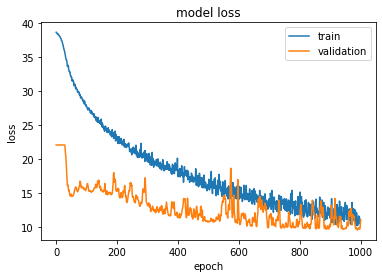

Train MAE: 6.998824226329604


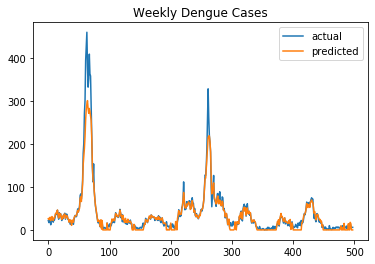

Validation MAE: 11.126794019519393


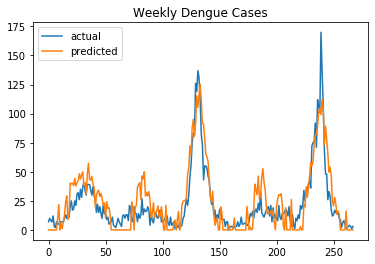

Forecast MAE: 14.252705673895665


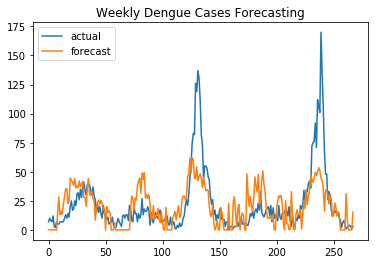

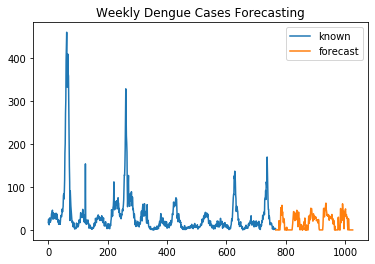

(6.998824226329604, 11.126794019519393, 14.252705673895665)


In [3]:
hyperparameters = {
    'train_split_percent': 0.65,
    'lookback_window': 170,
    'verbose':False,
    'plot':True,
    'epochs': 1000,
    'lr':5e-5,
    'city':'sj',
}
experiment = Experiment(get_model, hyperparameters)
stats_df_1, df_sj_1 = experiment.run()
print(stats_df_1)

(?, 23, 170)
Training...
Elapsed Time: 60.410043716430664


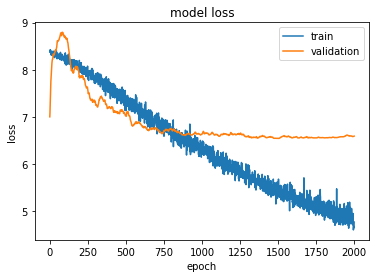

Train MAE: 4.589631190360115


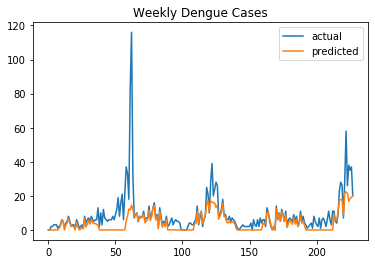

Validation MAE: 6.59345525942865


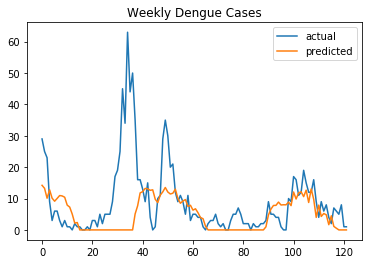

Forecast MAE: 6.9190255653907045


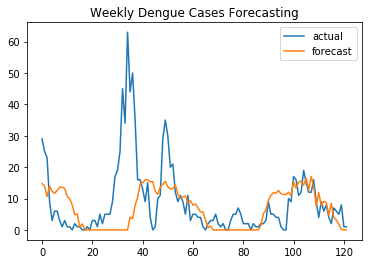

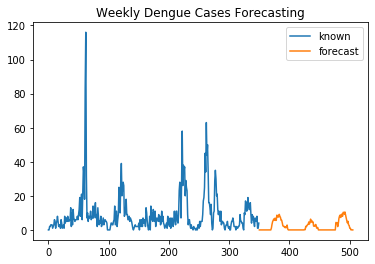

(4.589631190360115, 6.59345525942865, 6.9190255653907045)


In [4]:
hyperparameters = {
    'train_split_percent': 0.65,
    'lookback_window': 170,
    'verbose':False,
    'plot':True,
    'epochs': 2000,
    'lr':5e-6,
    'city':'iq'
}
experiment = Experiment(get_model, hyperparameters)
stats_iq_1, df_iq_1 = experiment.run()
print(stats_iq_1)

## Feature Regression

(?, 22, 170)
Training...
Elapsed Time: 56.25698375701904


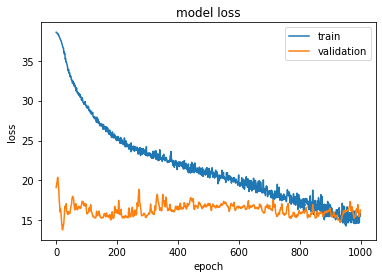

Train MAE: 9.926131384439737


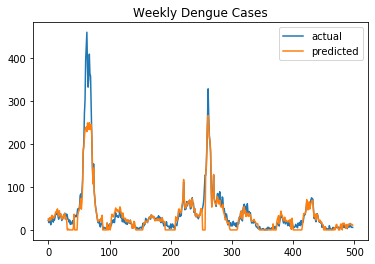

Validation MAE: 16.228348775586085


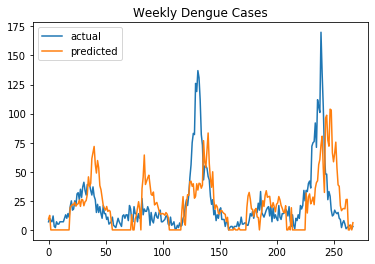

Forecast MAE: 15.94536790918948


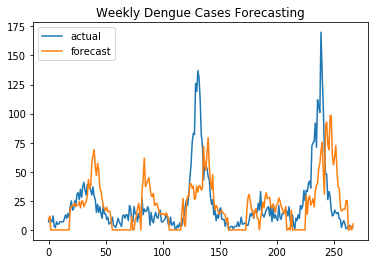

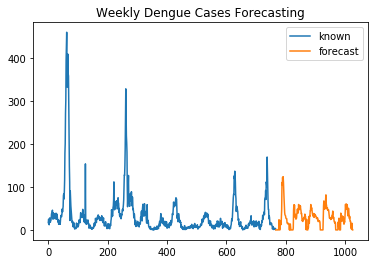

(9.926131384439737, 16.228348775586085, 15.94536790918948)


In [5]:
hyperparameters = {
    'train_split_percent': 0.65,
    'lookback_window': 170,
    'verbose':False,
    'plot':True,
    'epochs': 1000,
    'lr':5e-5,
    'only_features': True,
    'city':'sj'
}
experiment = Experiment(get_model, hyperparameters)
stats_df_2, df_sj_2 = experiment.run()
print(stats_df_2)

(?, 22, 170)
Training...
Elapsed Time: 60.097673416137695


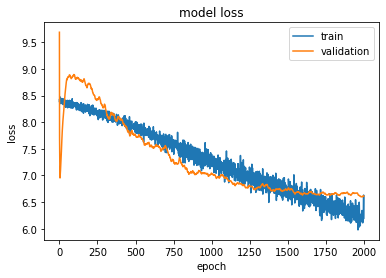

Train MAE: 5.845884444812934


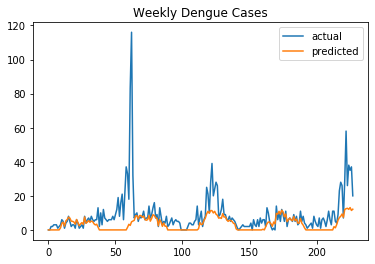

Validation MAE: 6.611986302938617


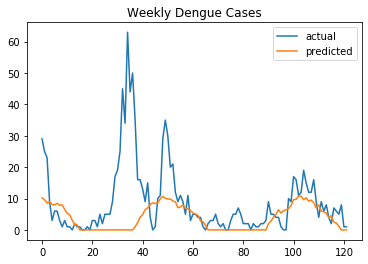

Forecast MAE: 6.667456120619031


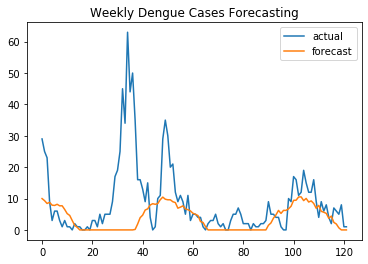

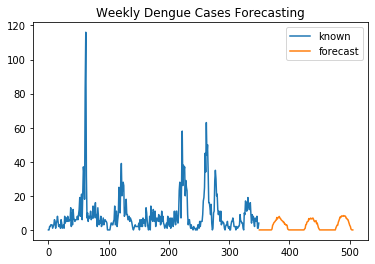

(5.845884444812934, 6.611986302938617, 6.667456120619031)


In [6]:
hyperparameters = {
    'train_split_percent': 0.65,
    'lookback_window': 170,
    'verbose':False,
    'plot':True,
    'epochs': 2000,
    'lr':3e-6,
    'only_features': True,
    'city':'iq'
}
experiment = Experiment(get_model, hyperparameters)
stats_iq_2, df_iq_2 = experiment.run()
print(stats_iq_2)

In [8]:
submission_dataframe = pd.concat([df_sj_1, df_iq_2])
submission_dataframe.to_csv("submission_mlp.csv", index=False)
import drivendata_validator.drivendata_validator as dd
v = dd.DrivenDataValidator()
v.validate('../data/submission_format.csv', 'submission_mlp.csv')

,year,weekofyear,total_cases
city,,,
sj,2008,18,0
sj,2008,19,0
sj,2008,20,0
sj,2008,21,0
sj,2008,22,0
...,...,...,...
iq,2013,22,2
iq,2013,23,1
iq,2013,24,0
